<a href="https://colab.research.google.com/github/uichann/My_Repository/blob/main/RNN_LSTM_%EC%8B%A4%EC%8A%B5(%ED%95%9C%EA%B5%AD%EC%A0%84%EB%A0%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,20)

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import FinanceDataReader as fdr

In [4]:
kor = fdr.DataReader('015760')

In [5]:
kor.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-10-27,16700,17200,16650,17100,1544560,0.027027
2022-10-28,17100,17200,16950,17050,745350,-0.002924
2022-10-31,17100,17150,16600,16750,1421884,-0.017595
2022-11-01,16950,17300,16850,17200,1810055,0.026866
2022-11-02,17050,17150,16700,16700,1757164,-0.029070


In [6]:
kor.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-08-08,16350,16650,16300,16300,343010,NaN
1998-08-10,16600,16600,16300,16450,424410,0.009202
1998-08-11,16450,16750,16450,16500,878480,0.003040
1998-08-12,16400,16400,15800,16100,1034810,-0.024242
1998-08-13,16100,16250,15900,16000,918940,-0.006211


In [7]:
STOCK_CODE = '015760'

In [8]:
stock = fdr.DataReader(STOCK_CODE)
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-08-08,16350,16650,16300,16300,343010,NaN
1998-08-10,16600,16600,16300,16450,424410,0.009202
1998-08-11,16450,16750,16450,16500,878480,0.003040
1998-08-12,16400,16400,15800,16100,1034810,-0.024242
1998-08-13,16100,16250,15900,16000,918940,-0.006211


In [9]:
stock.describe()

,Open,High,Low,Close,Volume,Change
count,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,5999.000000
mean,31311.741667,31739.308333,30874.500000,31302.500000,1.749895e+06,0.000236
std,9579.619551,9684.539973,9449.263394,9572.445475,1.514785e+06,0.021599
min,16000.000000,16250.000000,15550.000000,16000.000000,8.789000e+04,-0.135957
25%,23600.000000,23950.000000,23200.000000,23600.000000,1.013883e+06,-0.011004
50%,29400.000000,29850.000000,29000.000000,29350.000000,1.407144e+06,0.000000
75%,37550.000000,38000.000000,37100.000000,37500.000000,2.018098e+06,0.010462
max,63100.000000,63700.000000,62500.000000,63000.000000,4.572794e+07,0.149877


In [10]:
stock.index

DatetimeIndex(['1998-08-08', '1998-08-10', '1998-08-11', '1998-08-12',
               '1998-08-13', '1998-08-14', '1998-08-17', '1998-08-18',
               '1998-08-19', '1998-08-20',
               ...
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-31',
               '2022-11-01', '2022-11-02'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [11]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [12]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1998-08-08,16350,16650,16300,16300,343010,NaN,1998,8,8
1998-08-10,16600,16600,16300,16450,424410,0.009202,1998,8,10
1998-08-11,16450,16750,16450,16500,878480,0.003040,1998,8,11
1998-08-12,16400,16400,15800,16100,1034810,-0.024242,1998,8,12
1998-08-13,16100,16250,15900,16000,918940,-0.006211,1998,8,13


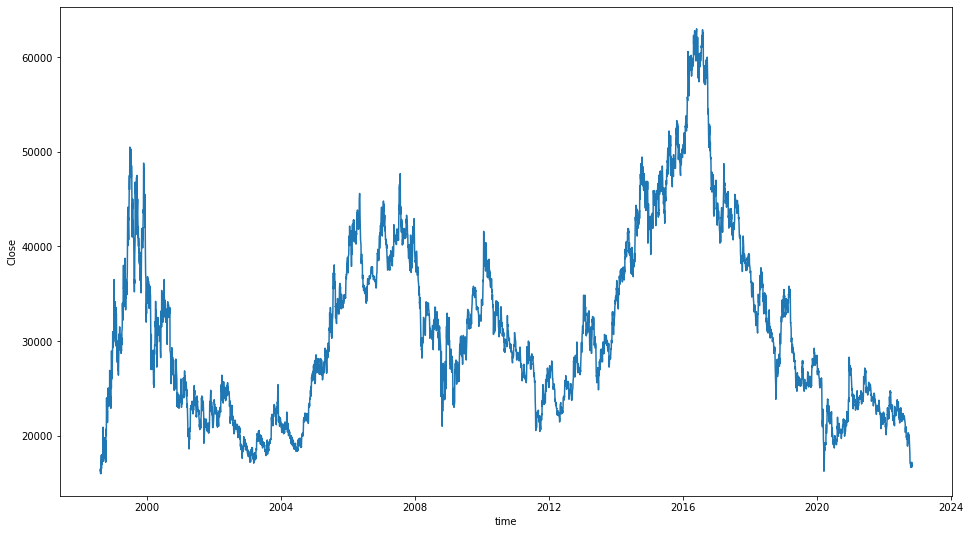

In [15]:
plt.figure(figsize = (16,9))
sns.lineplot(y=stock['Close'],x=stock.index)
plt.xlabel('time')
plt.show()

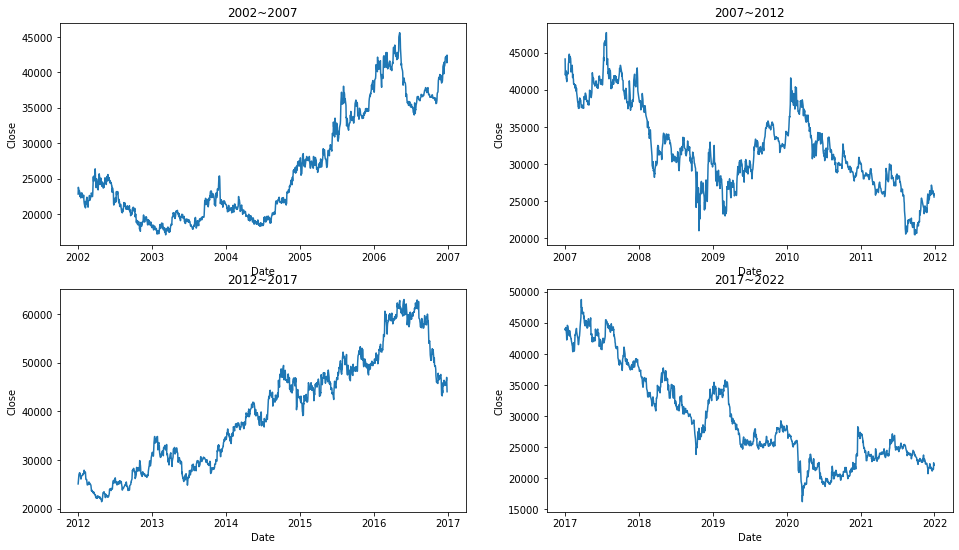

In [16]:
time_steps = [['2002','2007'],['2007','2012'],['2012','2017'],['2017','2022']]
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)

for i in range(4):
    ax = axes[i//2,i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x = df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')

plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open','High','Low','Close','Volume']

scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.007431  , 0.00842993, 0.01597444, 0.00638298, 0.00558983],
       [0.01273885, 0.00737619, 0.01597444, 0.00957447, 0.00737335],
       [0.00955414, 0.01053741, 0.01916933, 0.0106383 , 0.01732229],
       ...,
       [0.02335456, 0.01896733, 0.02236422, 0.01595745, 0.02922859],
       [0.02016985, 0.02212856, 0.02768903, 0.02553191, 0.03773364],
       [0.02229299, 0.01896733, 0.02449414, 0.01489362, 0.03657477]])

In [18]:
df = pd.DataFrame(scaled, columns = scale_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   float64
 1   High    6000 non-null   float64
 2   Low     6000 non-null   float64
 3   Close   6000 non-null   float64
 4   Volume  6000 non-null   float64
dtypes: float64(5)
memory usage: 234.5 KB


In [19]:
from sklearn.model_selection import train_test_split as tts

In [20]:
x_train,x_test,y_train,y_test = tts(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [21]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [22]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [23]:
x_train

,Open,High,Low,Volume
0,0.007431,0.008430,0.015974,0.005590
1,0.012739,0.007376,0.015974,0.007373
2,0.009554,0.010537,0.019169,0.017322
3,0.008493,0.003161,0.005325,0.020748
4,0.002123,0.000000,0.007455,0.018209
...,...,...,...,...
4795,0.485138,0.477345,0.470714,0.031024
4796,0.464968,0.458377,0.470714,0.014996
4797,0.471338,0.462592,0.473908,0.013770
4798,0.466030,0.467861,0.473908,0.017241


In [24]:
y_train

0       0.006383
1       0.009574
2       0.010638
3       0.002128
4       0.000000
          ...   
4795    0.468085
4796    0.465957
4797    0.470213
4798    0.477660
4799    0.482979
Name: Close, Length: 4800, dtype: float64

In [25]:
import tensorflow as tf

In [27]:
def windowed_dataset(series, window_size, batch_size,shuffle):
    series = tf.expand_dims(series,axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)

    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

    

In [28]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [29]:
train_data = windowed_dataset(y_train,WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)


In [30]:
for data in train_data.take(1):
    print(f'데이터셋(x) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(x) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size = 5,
           padding = 'causal',
           activation = 'relu',
           input_shape = [WINDOW_SIZE,1]),
    LSTM(16, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [32]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])

In [33]:
earlystopping  = EarlyStopping(monitor = 'val_loss', patience=10)
filename = os.path.join('tmp', 'checkpointer.okpt')
checkpoint = ModelCheckpoint(filename,
                             save_weigt_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verboss=1)


In [34]:
history = model.fit(train_data,validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint,earlystopping])

Epoch 1/50
    149/Unknown - 13s 7ms/step - loss: 0.0067 - mse: 0.0134

150/150 [==============================] - 19s 44ms/step - loss: 0.0067 - mse: 0.0134 - val_loss: 2.9648e-04 - val_mse: 5.9296e-04
Epoch 2/50
145/150 [============================>.] - ETA: 0s - loss: 5.2074e-04 - mse: 0.0010

150/150 [==============================] - 6s 40ms/step - loss: 5.1745e-04 - mse: 0.0010 - val_loss: 2.4309e-04 - val_mse: 4.8619e-04
Epoch 3/50
146/150 [============================>.] - ETA: 0s - loss: 4.5078e-04 - mse: 9.0157e-04

150/150 [==============================] - 6s 38ms/step - loss: 4.5414e-04 - mse: 9.0827e-04 - val_loss: 2.3363e-04 - val_mse: 4.6725e-04
Epoch 4/50
148/150 [============================>.] - ETA: 0s - loss: 4.0226e-04 - mse: 8.0453e-04

150/150 [==============================] - 7s 47ms/step - loss: 4.0228e-04 - mse: 8.0457e-04 - val_loss: 1.9176e-04 - val_mse: 3.8351e-04
Epoch 5/50
147/150 [============================>.] - ETA: 0s - loss: 3.6646e-04 - mse: 7.3292e-04

150/150 [==============================] - 6s 37ms/step - loss: 3.6651e-04 - mse: 7.3303e-04 - val_loss: 1.7746e-04 - val_mse: 3.5493e-04
Epoch 6/50
145/150 [============================>.] - ETA: 0s - loss: 3.2265e-04 - mse: 6.4530e-04

150/150 [==============================] - 6s 40ms/step - loss: 3.2548e-04 - mse: 6.5096e-04 - val_loss: 1.5450e-04 - val_mse: 3.0900e-04
Epoch 7/50
147/150 [============================>.] - ETA: 0s - loss: 3.0066e-04 - mse: 6.0132e-04

150/150 [==============================] - 6s 37ms/step - loss: 2.9855e-04 - mse: 5.9710e-04 - val_loss: 1.3496e-04 - val_mse: 2.6991e-04
Epoch 8/50
148/150 [============================>.] - ETA: 0s - loss: 2.6520e-04 - mse: 5.3040e-04

150/150 [==============================] - 6s 41ms/step - loss: 2.6531e-04 - mse: 5.3062e-04 - val_loss: 1.2977e-04 - val_mse: 2.5955e-04
Epoch 9/50
150/150 [==============================] - 1s 9ms/step - loss: 2.4852e-04 - mse: 4.9705e-04 - val_loss: 1.3068e-04 - val_mse: 2.6136e-04
Epoch 10/50
150/150 [==============================] - 1s 9ms/step - loss: 2.3745e-04 - mse: 4.7489e-04 - val_loss: 1.3618e-04 - val_mse: 2.7236e-04
Epoch 11/50
146/150 [============================>.] - ETA: 0s - loss: 2.0845e-04 - mse: 4.1691e-04

150/150 [==============================] - 6s 41ms/step - loss: 2.0912e-04 - mse: 4.1825e-04 - val_loss: 1.0121e-04 - val_mse: 2.0241e-04
Epoch 12/50
142/150 [===========================>..] - ETA: 0s - loss: 2.0162e-04 - mse: 4.0324e-04

150/150 [==============================] - 6s 40ms/step - loss: 2.0096e-04 - mse: 4.0191e-04 - val_loss: 9.2116e-05 - val_mse: 1.8423e-04
Epoch 13/50
142/150 [===========================>..] - ETA: 0s - loss: 1.8432e-04 - mse: 3.6865e-04

150/150 [==============================] - 6s 39ms/step - loss: 1.8852e-04 - mse: 3.7704e-04 - val_loss: 9.0840e-05 - val_mse: 1.8168e-04
Epoch 14/50
149/150 [============================>.] - ETA: 0s - loss: 1.8152e-04 - mse: 3.6304e-04

150/150 [==============================] - 6s 37ms/step - loss: 1.8153e-04 - mse: 3.6305e-04 - val_loss: 8.4700e-05 - val_mse: 1.6940e-04
Epoch 15/50
150/150 [==============================] - 1s 8ms/step - loss: 1.7974e-04 - mse: 3.5948e-04 - val_loss: 9.3288e-05 - val_mse: 1.8658e-04
Epoch 16/50
146/150 [============================>.] - ETA: 0s - loss: 1.7404e-04 - mse: 3.4809e-04

150/150 [==============================] - 6s 40ms/step - loss: 1.7483e-04 - mse: 3.4967e-04 - val_loss: 7.7406e-05 - val_mse: 1.5481e-04
Epoch 17/50
150/150 [==============================] - 1s 8ms/step - loss: 1.6428e-04 - mse: 3.2856e-04 - val_loss: 7.7711e-05 - val_mse: 1.5542e-04
Epoch 18/50
150/150 [==============================] - 1s 9ms/step - loss: 1.6583e-04 - mse: 3.3166e-04 - val_loss: 8.6422e-05 - val_mse: 1.7284e-04
Epoch 19/50
147/150 [============================>.] - ETA: 0s - loss: 1.6339e-04 - mse: 3.2677e-04

150/150 [==============================] - 6s 38ms/step - loss: 1.6400e-04 - mse: 3.2800e-04 - val_loss: 7.5041e-05 - val_mse: 1.5008e-04
Epoch 20/50
149/150 [============================>.] - ETA: 0s - loss: 1.5783e-04 - mse: 3.1566e-04

150/150 [==============================] - 6s 40ms/step - loss: 1.5769e-04 - mse: 3.1537e-04 - val_loss: 7.0457e-05 - val_mse: 1.4091e-04
Epoch 21/50
150/150 [==============================] - 1s 9ms/step - loss: 1.5803e-04 - mse: 3.1607e-04 - val_loss: 7.4355e-05 - val_mse: 1.4871e-04
Epoch 22/50
150/150 [==============================] - 2s 14ms/step - loss: 1.5287e-04 - mse: 3.0574e-04 - val_loss: 9.3184e-05 - val_mse: 1.8637e-04
Epoch 23/50
150/150 [==============================] - 1s 9ms/step - loss: 1.4949e-04 - mse: 2.9899e-04 - val_loss: 7.7200e-05 - val_mse: 1.5440e-04
Epoch 24/50
150/150 [==============================] - 1s 9ms/step - loss: 1.5081e-04 - mse: 3.0162e-04 - val_loss: 8.8263e-05 - val_mse: 1.7653e-04
Epoch 25/50
150/150 [==============================] - 1s 9ms/step - loss: 1.4790e-04 - mse: 2.9580e-04 - val_loss: 7.0887e-05 - val_mse: 1.4177e-04
Epoch 26/50
144/150 [===========================>..] - ETA: 0s - loss: 1.5160e-04 - mse: 3.0321e-04

150/150 [==============================] - 6s 37ms/step - loss: 1.4972e-04 - mse: 2.9945e-04 - val_loss: 6.5772e-05 - val_mse: 1.3154e-04
Epoch 27/50
150/150 [==============================] - 1s 9ms/step - loss: 1.4613e-04 - mse: 2.9226e-04 - val_loss: 7.2488e-05 - val_mse: 1.4498e-04
Epoch 28/50
150/150 [==============================] - 1s 9ms/step - loss: 1.4296e-04 - mse: 2.8591e-04 - val_loss: 6.7702e-05 - val_mse: 1.3540e-04
Epoch 29/50
150/150 [==============================] - 2s 9ms/step - loss: 1.3863e-04 - mse: 2.7726e-04 - val_loss: 6.7841e-05 - val_mse: 1.3568e-04
Epoch 30/50
150/150 [==============================] - 2s 9ms/step - loss: 1.5431e-04 - mse: 3.0862e-04 - val_loss: 6.6833e-05 - val_mse: 1.3367e-04
Epoch 31/50
150/150 [==============================] - 1s 9ms/step - loss: 1.4021e-04 - mse: 2.8041e-04 - val_loss: 6.8038e-05 - val_mse: 1.3608e-04
Epoch 32/50
146/150 [============================>.] - ETA: 0s - loss: 1.4634e-04 - mse: 2.9267e-04

150/150 [==============================] - 6s 39ms/step - loss: 1.4682e-04 - mse: 2.9365e-04 - val_loss: 6.2917e-05 - val_mse: 1.2583e-04
Epoch 33/50
146/150 [============================>.] - ETA: 0s - loss: 1.3531e-04 - mse: 2.7062e-04

150/150 [==============================] - 6s 38ms/step - loss: 1.3554e-04 - mse: 2.7107e-04 - val_loss: 6.1039e-05 - val_mse: 1.2208e-04
Epoch 34/50
150/150 [==============================] - 2s 12ms/step - loss: 1.3852e-04 - mse: 2.7704e-04 - val_loss: 6.8012e-05 - val_mse: 1.3602e-04
Epoch 35/50
150/150 [==============================] - 2s 14ms/step - loss: 1.3933e-04 - mse: 2.7865e-04 - val_loss: 6.1229e-05 - val_mse: 1.2246e-04
Epoch 36/50
150/150 [==============================] - 1s 8ms/step - loss: 1.3881e-04 - mse: 2.7762e-04 - val_loss: 6.4040e-05 - val_mse: 1.2808e-04
Epoch 37/50
146/150 [============================>.] - ETA: 0s - loss: 1.4581e-04 - mse: 2.9163e-04

150/150 [==============================] - 6s 40ms/step - loss: 1.4598e-04 - mse: 2.9196e-04 - val_loss: 6.0270e-05 - val_mse: 1.2054e-04
Epoch 38/50
150/150 [==============================] - 1s 9ms/step - loss: 1.3306e-04 - mse: 2.6612e-04 - val_loss: 8.4438e-05 - val_mse: 1.6888e-04
Epoch 39/50
150/150 [==============================] - 1s 9ms/step - loss: 1.3924e-04 - mse: 2.7847e-04 - val_loss: 8.7820e-05 - val_mse: 1.7564e-04
Epoch 40/50
147/150 [============================>.] - ETA: 0s - loss: 1.3336e-04 - mse: 2.6672e-04

150/150 [==============================] - 6s 42ms/step - loss: 1.3337e-04 - mse: 2.6674e-04 - val_loss: 5.7378e-05 - val_mse: 1.1476e-04
Epoch 41/50
150/150 [==============================] - 1s 9ms/step - loss: 1.3944e-04 - mse: 2.7889e-04 - val_loss: 5.7609e-05 - val_mse: 1.1522e-04
Epoch 42/50
150/150 [==============================] - 1s 9ms/step - loss: 1.2869e-04 - mse: 2.5738e-04 - val_loss: 6.3374e-05 - val_mse: 1.2675e-04
Epoch 43/50
150/150 [==============================] - 1s 8ms/step - loss: 1.3048e-04 - mse: 2.6096e-04 - val_loss: 5.8497e-05 - val_mse: 1.1699e-04
Epoch 44/50
150/150 [==============================] - 1s 9ms/step - loss: 1.2924e-04 - mse: 2.5848e-04 - val_loss: 9.5641e-05 - val_mse: 1.9128e-04
Epoch 45/50
148/150 [============================>.] - ETA: 0s - loss: 1.3016e-04 - mse: 2.6032e-04

150/150 [==============================] - 6s 40ms/step - loss: 1.2990e-04 - mse: 2.5980e-04 - val_loss: 5.5234e-05 - val_mse: 1.1047e-04
Epoch 46/50
149/150 [============================>.] - ETA: 0s - loss: 1.2997e-04 - mse: 2.5995e-04

150/150 [==============================] - 6s 37ms/step - loss: 1.2981e-04 - mse: 2.5962e-04 - val_loss: 5.5147e-05 - val_mse: 1.1029e-04
Epoch 47/50
150/150 [==============================] - 1s 9ms/step - loss: 1.2666e-04 - mse: 2.5333e-04 - val_loss: 5.6851e-05 - val_mse: 1.1370e-04
Epoch 48/50
150/150 [==============================] - 2s 9ms/step - loss: 1.3204e-04 - mse: 2.6408e-04 - val_loss: 5.6084e-05 - val_mse: 1.1217e-04
Epoch 49/50
150/150 [==============================] - 1s 9ms/step - loss: 1.2559e-04 - mse: 2.5118e-04 - val_loss: 6.4526e-05 - val_mse: 1.2905e-04
Epoch 50/50
150/150 [==============================] - 1s 8ms/step - loss: 1.2586e-04 - mse: 2.5172e-04 - val_loss: 6.1210e-05 - val_mse: 1.2242e-04


In [36]:
model.load_weights(filename)

In [37]:
pre = model.predict(test_data)

37/37 [==============================] - 1s 9ms/step


In [38]:
pre.shape

(1180, 1)

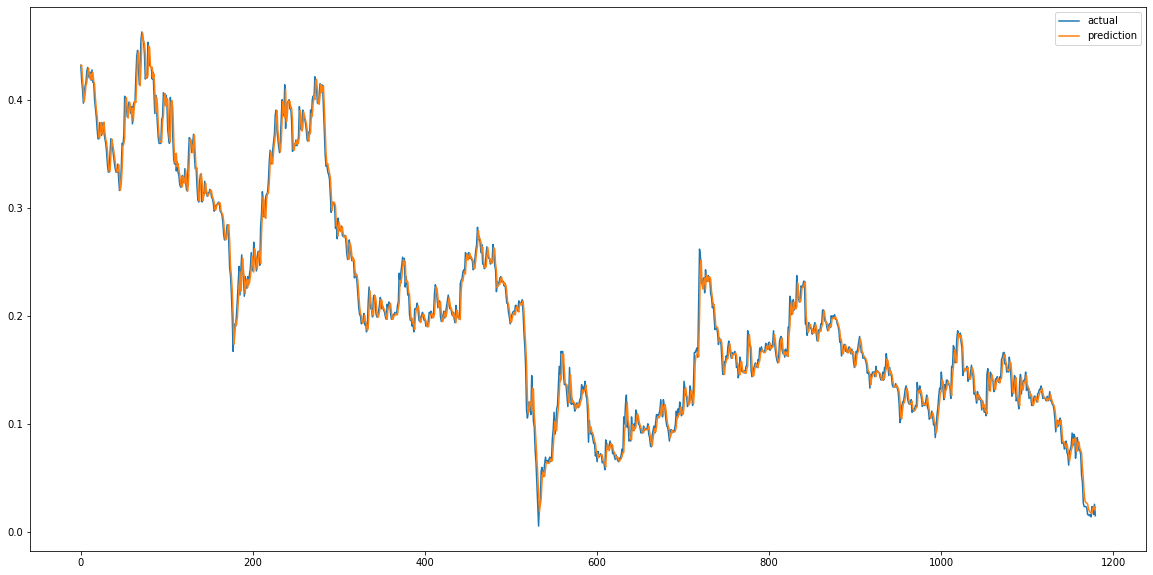

In [39]:
plt.figure(figsize=(20,10))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pre,label='prediction')
plt.legend()
plt.show()